In [1]:
import sys
import ROOT
import numpy as np
import pandas as pd
import root_pandas
import matplotlib.pyplot as plt
import uproot
import time
import seaborn as sb

Welcome to JupyROOT 6.16/00


/Users/jonamotta/anaconda3/envs/python_root/lib/python2.7/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.16.3 is currently installed but you installed root_numpy against numpy 1.9.3. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [5]:
########################################
### READ TREES AND CREATE DATAFRAMES ###
########################################


# fix random seed for reproducibility
np.random.seed(1986)


#create DataFrames with the values coming from the trees
file_tau = uproot.open('bc_jpsi_tau_nu_gen_v2.root')
tree_tau = file_tau['tree;1']
tau  = tree_tau.pandas.df(tree_tau.keys())

file_mu = uproot.open('bc_jpsi_mu_nu_gen_v2.root')
tree_mu = file_mu['tree;1']
mu  = tree_mu.pandas.df(tree_mu.keys())

In [6]:
############################################
### ADD NECESSARY FEATURES TO DATAFRAMES ###
############################################


#add the column target to both dataframes
mu ['target'] = 0
tau['target'] = 1

#add the columns of interesting features (taken from LHCb paper)
mu['m2_miss'] = 0 #missing mass square (p_B - p_mu1 - p_mu2 - p_mu)^2
tau['m2_miss'] = 0 
mu['muE_Brf'] = 0 #mu energy in the Bc rest frame
tau['muE_Brf'] = 0 
mu['q2'] = 0 #squared 4momentum transfer to lepton sys (p_B - p_mu1 - p_mu2)^2
tau['q2'] = 0
mu['pT_miss'] = 0 #misisng pT of the final state 
tau['pT_miss'] = 0

bc_vect = ROOT.TLorentzVector()
jpsi_vect = ROOT.TLorentzVector()
mu_vect = ROOT.TLorentzVector()
mu1_vect = ROOT.TLorentzVector()
mu2_vect = ROOT.TLorentzVector()
mu_mass = 0.10565837 #GeV/c^2
c = 2.99e8 #m/s


start = time.time()
i = 0
while i < mu['run'].count():
    bc_vect.SetPtEtaPhiM(mu.at[i,'bc_pt'],mu.at[i,'bc_eta'],mu.at[i,'bc_phi'],mu.at[i,'bc_mass'])
    mu_vect.SetPtEtaPhiM(mu.at[i,'mu_pt'],mu.at[i,'mu_eta'],mu.at[i,'mu_phi'],mu_mass)
    mu1_vect.SetPtEtaPhiM(mu.at[i,'mu1_pt'],mu.at[i,'mu1_eta'],mu.at[i,'mu1_phi'],mu_mass)
    mu2_vect.SetPtEtaPhiM(mu.at[i,'mu2_pt'],mu.at[i,'mu2_eta'],mu.at[i,'mu2_phi'],mu_mass)
    
    m2_vect = bc_vect - mu1_vect - mu2_vect - mu_vect
    q2_vect = bc_vect - mu1_vect - mu2_vect
    
    mu.at[i,'m2_miss'] = m2_vect.Mag2()
    mu.at[i,'q2'] = q2_vect.Mag2()
    mu.at[i,'muE_Brf'] = mu_vect.E() * np.cosh(mu_vect.Rapidity() - bc_vect.Rapidity())
    mu.at[i,'pT_miss'] = m2_vect.Pt()
    
    i += 1
    
i = 0
while i < tau['run'].count():
    bc_vect.SetPtEtaPhiM(tau.at[i,'bc_pt'],tau.at[i,'bc_eta'],tau.at[i,'bc_phi'],tau.at[i,'bc_mass'])
    mu_vect.SetPtEtaPhiM(tau.at[i,'mu_pt'],tau.at[i,'mu_eta'],tau.at[i,'mu_phi'],mu_mass)
    mu1_vect.SetPtEtaPhiM(tau.at[i,'mu1_pt'],tau.at[i,'mu1_eta'],tau.at[i,'mu1_phi'],mu_mass)
    mu2_vect.SetPtEtaPhiM(tau.at[i,'mu2_pt'],tau.at[i,'mu2_eta'],tau.at[i,'mu2_phi'],mu_mass)
    
    m2_vect = bc_vect - mu1_vect - mu2_vect - mu_vect
    q2_vect = bc_vect - mu1_vect - mu2_vect
    
    tau.at[i,'m2_miss'] = m2_vect.Mag2()
    tau.at[i,'q2'] = q2_vect.Mag2()
    tau.at[i,'muE_Brf'] = mu_vect.E() * np.cosh(mu_vect.Rapidity() - bc_vect.Rapidity())
    tau.at[i,'pT_miss'] = m2_vect.Pt()
    
    i += 1
    
end = time.time()
print 'Running time to add the three new vars to the df = %.1f'%(end - start)

Running time to add the three new vars to the df = 508.8


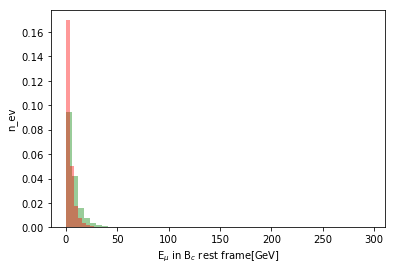

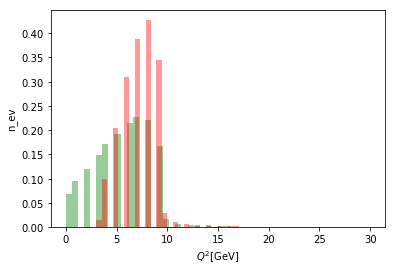

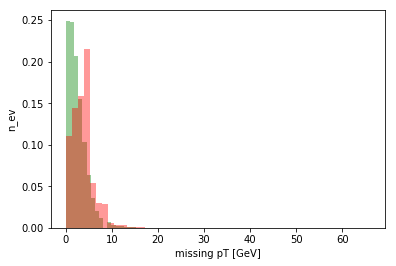

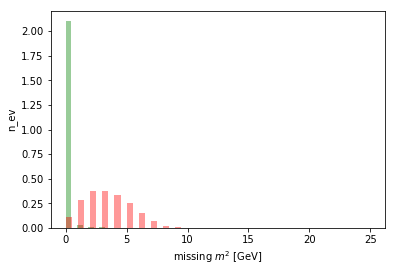

In [20]:
sb.distplot(mu['muE_Brf'], kde=False, color='g', norm_hist=True, label='$\mu$ channel')
sb.distplot(tau['muE_Brf'], kde=False, color='r', norm_hist=True, label='$\tau$ channel')
plt.xlabel('E$_{\mu}$ in B$_c$ rest frame[GeV]')
plt.ylabel('n_ev')
plt.show()

sb.distplot(mu['q2'], kde=False, color='g', norm_hist=True, label='$\mu$ channel')
sb.distplot(tau['q2'], kde=False, color='r', norm_hist=True, label='$\tau$ channel')
plt.xlabel('$Q^2$[GeV]')
plt.ylabel('n_ev')
plt.show()

sb.distplot(mu['pT_miss'], kde=False, color='g', norm_hist=True, label='$\mu$ channel')
sb.distplot(tau['pT_miss'], kde=False, color='r', norm_hist=True, label='$\tau$ channel')
plt.xlabel('missing pT [GeV]')
plt.ylabel('n_ev')
plt.show()

sb.distplot(mu['m2_miss'], kde=False, color='g', norm_hist=True, label='$\mu$ channel')
sb.distplot(tau['m2_miss'], kde=False, color='r', norm_hist=True, label='$\tau$ channel')
plt.xlabel('missing $m^2$ [GeV]')
plt.ylabel('n_ev')
plt.show()

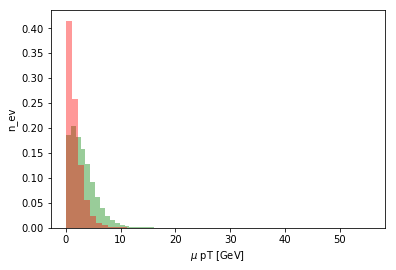

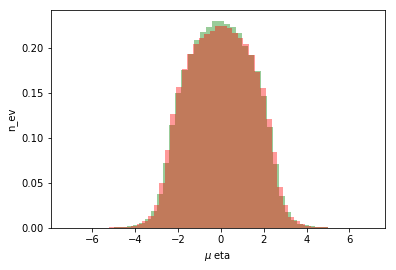

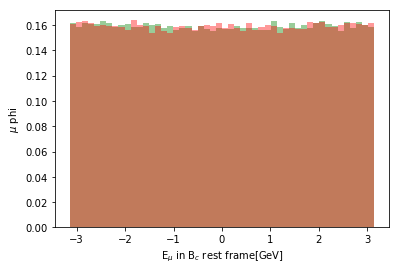

In [10]:
sb.distplot(mu['mu_pt'], kde=False, color='g', norm_hist=True, label='$\mu$ channel')
sb.distplot(tau['mu_pt'], kde=False, color='r', norm_hist=True, label='$\tau$ channel')
plt.xlabel('$\mu$ pT [GeV]')
plt.ylabel('n_ev')
plt.show()

sb.distplot(mu['mu_eta'], kde=False, color='g', norm_hist=True, label='$\mu$ channel')
sb.distplot(tau['mu_eta'], kde=False, color='r', norm_hist=True, label='$\tau$ channel')
plt.xlabel('$\mu$ eta')
plt.ylabel('n_ev')
plt.show()

sb.distplot(mu['mu_phi'], kde=False, color='g', norm_hist=True, label='$\mu$ channel')
sb.distplot(tau['mu_phi'], kde=False, color='r', norm_hist=True, label='$\tau$ channel')
plt.xlabel('$\mu$ phi')
plt.ylabel('n_ev')
plt.show()

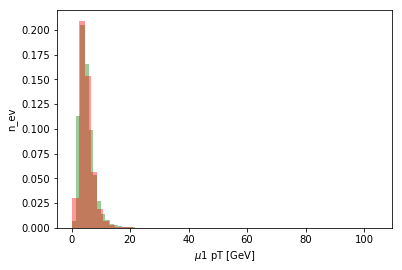

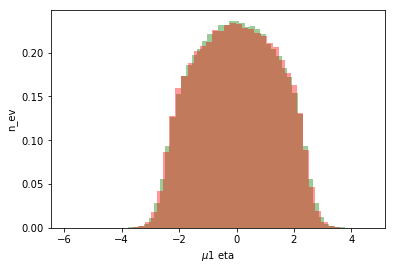

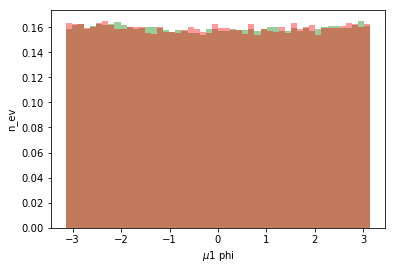

In [11]:
sb.distplot(mu['mu1_pt'], kde=False, color='g', norm_hist=True, label='$\mu$ channel')
sb.distplot(tau['mu1_pt'], kde=False, color='r', norm_hist=True, label='$\tau$ channel')
plt.xlabel('$\mu1$ pT [GeV]')
plt.ylabel('n_ev')
plt.show()

sb.distplot(mu['mu1_eta'], kde=False, color='g', norm_hist=True, label='$\mu$ channel')
sb.distplot(tau['mu1_eta'], kde=False, color='r', norm_hist=True, label='$\tau$ channel')
plt.xlabel('$\mu1$ eta')
plt.ylabel('n_ev')
plt.show()

sb.distplot(mu['mu1_phi'], kde=False, color='g', norm_hist=True, label='$\mu$ channel')
sb.distplot(tau['mu1_phi'], kde=False, color='r', norm_hist=True, label='$\tau$ channel')
plt.xlabel('$\mu1$ phi')
plt.ylabel('n_ev')
plt.show()

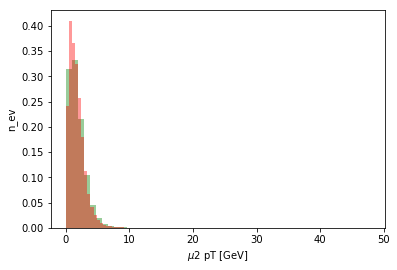

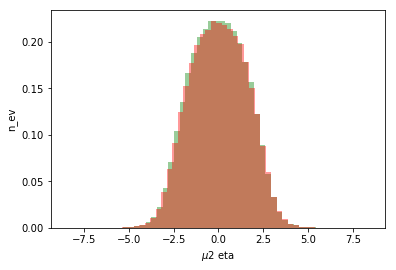

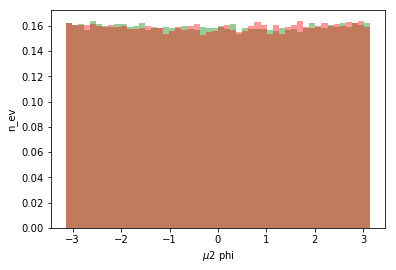

In [12]:
sb.distplot(mu['mu2_pt'], kde=False, color='g', norm_hist=True, label='$\mu$ channel')
sb.distplot(tau['mu2_pt'], kde=False, color='r', norm_hist=True, label='$\tau$ channel')
plt.xlabel('$\mu2$ pT [GeV]')
plt.ylabel('n_ev')
plt.show()

sb.distplot(mu['mu2_eta'], kde=False, color='g', norm_hist=True, label='$\mu$ channel')
sb.distplot(tau['mu2_eta'], kde=False, color='r', norm_hist=True, label='$\tau$ channel')
plt.xlabel('$\mu2$ eta')
plt.ylabel('n_ev')
plt.show()

sb.distplot(mu['mu2_phi'], kde=False, color='g', norm_hist=True, label='$\mu$ channel')
sb.distplot(tau['mu2_phi'], kde=False, color='r', norm_hist=True, label='$\tau$ channel')
plt.xlabel('$\mu2$ phi')
plt.ylabel('n_ev')
plt.show()